In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine(f"sqlite:///C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_10/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#check classes
engine.execute("SELECT * FROM measurement LIMIT 5").fetchall()
#number of dates
session.query(func.count(Measurement.date)).all()
#first date
session.query(Measurement.date).order_by(Measurement.date).first()
#latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#Calculate time delta
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date:", query_date)
#last 12 months of precipation data
session.query(Measurement.date).\
    filter(Measurement.date > "2016-08-22").\
    order_by(Measurement.date).all()
#retrieve date and precipitation scores
date_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > "2016-08-22").\
    order_by(Measurement.date).all()
#save as Pandas dataframe
df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
#drop NAs
df1=df.dropna(how="any")
df2 = df1.sort_values(["date"],ascending=False)
df2.head()
   

Query Date: 2016-08-23


,date,prcp
2229,2017-08-23,0.45
2228,2017-08-23,0.08
2227,2017-08-23,0.00
2226,2017-08-23,0.00
2225,2017-08-22,0.50


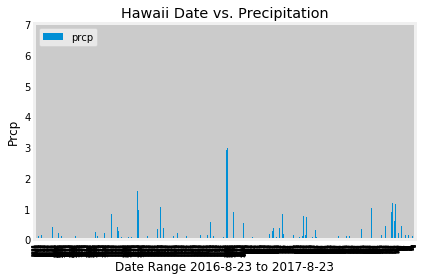

In [11]:
#plot the data
df2.plot.bar()
plt.title("Hawaii Date vs. Precipitation")
plt.ylabel("Prcp")
plt.xticks(size=5)
plt.xlabel("Date Range 2016-8-23 to 2017-8-23")
plt.tight_layout()
plt.savefig('C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_10/prcp.png', bbox_inches = "tight")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by (func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#lowest temp
session.query(func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

#highest temp
session.query(func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

#average temp
session.query(func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()



[(71.66378066378067)]

In [16]:
#pull data for the station with highest number of temp obs to check latest date
df3 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

df4 = pd.DataFrame(df3)
df5 = df4.sort_values(["date"],ascending=False)
df5.head()

,date,tobs
2771,2017-08-18,79.0
2770,2017-08-17,76.0
2769,2017-08-16,76.0
2768,2017-08-15,77.0
2767,2017-08-14,77.0


In [17]:
#last 12 months of station data
session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > "2016-07-17").\
    order_by(Measurement.date).all()
#retrieve date and tobs
date_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > "2016-07-17").\
    order_by(Measurement.date).all()
date_tobs
#save as Pandas dataframe
df6 = pd.DataFrame(date_tobs, columns=['date', 'tobs'])
df6
#drop NAs
df7=df6.dropna(how="any")
df7 = df7.sort_values(["date"],ascending=False)
df7.head()

,date,tobs
387,2017-08-18,79.0
386,2017-08-17,76.0
385,2017-08-16,76.0
384,2017-08-15,77.0
383,2017-08-14,77.0


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

max_tobs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date > "2016-08-22").\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
max_tobs

#save as Pandas dataframe
df8 = pd.DataFrame(max_tobs, columns=['station','tobs'])
df9 = df8["tobs"]
df9.head()

0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
Name: tobs, dtype: float64

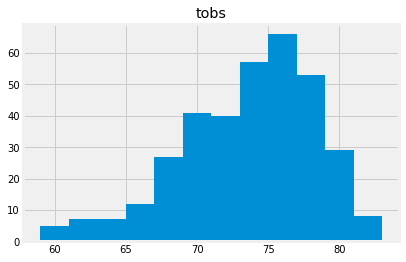

In [19]:
#x = np.arange(len(df9)
bins = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108]
plt.hist(df9, bins= 12)
plt.title("tobs")
plt.savefig('C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_10/tobs.png', bbox_inches = "tight")
plt.show()


![precipitation](Images/station-histogram.png)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#Using 1 year data before the above date
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


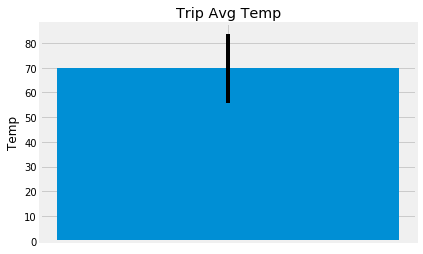

In [22]:
# Plot the results from your previous query as a bar chart. 
tmin = 61.0
tavg = 69.75510204081633
tmax = 75.0

plt.bar(1, tavg, yerr = tmax - tmin, tick_label="")
plt.ylabel("Temp")
plt.title("Trip Avg Temp")
#plt.figure(figsize=(2,6))
plt.savefig('C:/Users/kapali_s/Documents/SMU/Homeworks/Assignment_10/avg_temp.png', bbox_inches = "tight")
plt.show()

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.station, func.sum(Measurement.prcp),
              Station.name,
              Station.latitude,
              Station.longitude,
              Station.elevation)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= '2011-02-28' )\
.filter(Measurement.date <= '2011-03-05')\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc()).all()


[('USC00518838',
  2.33,
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6),
 ('USC00519281',
  2.23,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519523',
  2.19,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  1.96,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  1.45,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00513117', 1.44, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519397', 1.38, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00511918',
  0.63,
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 ('USC00517948', None, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]